In [1]:
#loading tensorflow from keras
from tensorflow import keras


2021-09-14 07:25:19.658159: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
#loading numpy ,os and pandas..
import os
import numpy as np
import pandas as pd

**Downloading Datasets And Creating The Paths**


In [3]:
#joining the paths using os  of train and test..
base='../input/state-farm-distracted-driver-detection'
train=os.path.join(base,'imgs/train/')
test=os.path.join(base,'imgs/test/')
data=pd.read_csv(os.path.join(base,'driver_imgs_list.csv'))

In [4]:

data.head()
data.describe()

,subject,classname,img
count,22424,22424,22424
unique,26,10,22424
top,p021,c0,img_16719.jpg
freq,1237,2489,1


In [5]:

import matplotlib.pyplot as plt


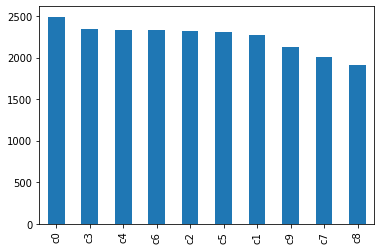

In [6]:
#plotting graph telling which label contain how many objects in the dataset..
label_count=data.classname.value_counts()
fig=label_count.plot(kind='bar')
    

In [7]:
Image_size=(224,224)
Batch_size=64

In [8]:
#importing image data generator for image augmentation....
from tensorflow.keras.preprocessing.image import ImageDataGenerator


**Doing Image Augmentation**

In [9]:
#doing image augmentation of training data , by providing values for zoom , width_shift,height_shift etc.
#also breaking the training data in validation and training data which can be further used while fitting.
train_gen=ImageDataGenerator(width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    validation_split=0.2)
test_gen=ImageDataGenerator()


In [10]:

train_data=train_gen.flow_from_directory(train,target_size=Image_size,batch_size=Batch_size,seed=42,subset='training')
val_data=train_gen.flow_from_directory(train,target_size=Image_size,batch_size=Batch_size,seed=42,subset='validation')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [11]:
#importing importnat file for making our model...
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


**Adding Layers In Model**

In [12]:
def model_layers(num_labels):
    #adding 3 (r,g,b) channels to our image and reshaping their size using input layer..
    inputs=Input(shape=(224,224,3))
    #using transfer leraning with efficientnetb3 pretrained model 
    base_model=EfficientNetB3(include_top=False , weights='imagenet')(inputs)
    x=GlobalAveragePooling2D()(base_model)
    x=BatchNormalization()(x)
    #using dropout to decrease the cahnce of overfitting and regularising our model..
    x=Dropout(0.2)(x)
    #by doing include_top=False we removed the dense layer of the pretrained model and now we are adding
    #our own dense output layer using softmax actuvation function..
    outputs=Dense(units=num_labels,activation='softmax')(x)
    model=Model(inputs=inputs,outputs=outputs)
    model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [13]:
#using 10 labels from 'c0' to 'c9' ...
model=model_layers(10)
model.summary()

2021-09-14 07:25:38.284428: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-14 07:25:38.287366: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-14 07:25:38.334528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-14 07:25:38.335174: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-14 07:25:38.335223: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-14 07:25:38.366602: I tensorflow/stream_executor/platform/def

43941888/43941136 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb3 (Functional)  (None, None, None, 1536)  10783535  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1536)              6144      
_________________________________________________________________
dropout (Dropout)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                15370     
Total params: 10,805,049
Trainable params: 10,714,674
Non-trai

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

**Doing Model Fitting**

In [15]:
#using callback feature earlystooping to stop early if the val_loss is not decreasig further
#and model check point so to store the best weights and to strat trainig from the best weights only..
checkpoint=ModelCheckpoint('best_model.hdf5',save_best_only=True,monitor='val_loss',mode='min')
es=EarlyStopping(monitor='val_loss',patience=3)
model.fit(train_data,epochs=10,validation_data=val_data,callbacks=[es,checkpoint])

2021-09-14 07:25:45.697639: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-14 07:25:45.700610: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000200000 Hz


Epoch 1/10


2021-09-14 07:25:58.884926: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-14 07:25:59.761745: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-14 07:26:00.214967: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


281/281 [==============================] - 563s 2s/step - loss: 1.6325 - accuracy: 0.4961 - val_loss: 0.2457 - val_accuracy: 0.9301
Epoch 2/10
281/281 [==============================] - 437s 2s/step - loss: 0.2496 - accuracy: 0.9212 - val_loss: 0.1098 - val_accuracy: 0.9670
Epoch 3/10
281/281 [==============================] - 447s 2s/step - loss: 0.1534 - accuracy: 0.9514 - val_loss: 0.0810 - val_accuracy: 0.9730
Epoch 4/10
281/281 [==============================] - 432s 2s/step - loss: 0.0958 - accuracy: 0.9677 - val_loss: 0.0549 - val_accuracy: 0.9833
Epoch 5/10
281/281 [==============================] - 432s 2s/step - loss: 0.0726 - accuracy: 0.9781 - val_loss: 0.0476 - val_accuracy: 0.9857
Epoch 6/10
281/281 [==============================] - 429s 2s/step - loss: 0.0526 - accuracy: 0.9828 - val_loss: 0.0438 - val_accuracy: 0.9859
Epoch 7/10
281/281 [==============================] - 429s 2s/step - loss: 0.0484 - accuracy: 0.9842 - val_loss: 0.0485 - val_accuracy: 0.9864
Epoch 8/10

**Making Predictions**

In [16]:
test=os.path.join(base,'imgs')
test_data=test_gen.flow_from_directory(test,shuffle=False,target_size=Image_size,batch_size=Batch_size,classes=['test'])

Found 79726 images belonging to 1 classes.


In [17]:
preds=model.predict(test_data)

In [18]:
test_imgs=os.path.join(base,"imgs/test")

test_ids=sorted(os.listdir(test_imgs))
pred_df=pd.DataFrame(columns=['img','c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])

#making the prediction table in the form as it was shown in sample_submission.....
for i in range(len(preds)):
    pred_df.loc[i,'img']=test_ids[i]
    pred_df.loc[i,'c0':'c9']=preds[i]
#converting the prediction table to csv file and saving it as submission..
pred_df.to_csv('submission.csv',index=False)    